In [46]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [47]:
df = pd.read_csv('placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [48]:
df.shape

(100, 4)

In [49]:
df.columns

Index(['Unnamed: 0', 'cgpa', 'iq', 'placement'], dtype='object')

In [50]:
#remove the 'Unnamed' column
df = df.drop(columns=['Unnamed: 0'])
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [51]:
#check for null values
df.isnull().sum()


cgpa         0
iq           0
placement    0
dtype: int64

In [52]:
#check duplicates
df.duplicated().sum()

np.int64(0)

In [53]:
#steps  
# 0. preprocess, eda , feature selection
# 1. extract input and output features
# 2. scale the values
# 3. train test split
# 4. train the model 
# 5. evaluate the model
# 6. deploy the model     

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [55]:
data  = df.iloc[:,0:]
data

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


Text(0, 0.5, 'IQ')

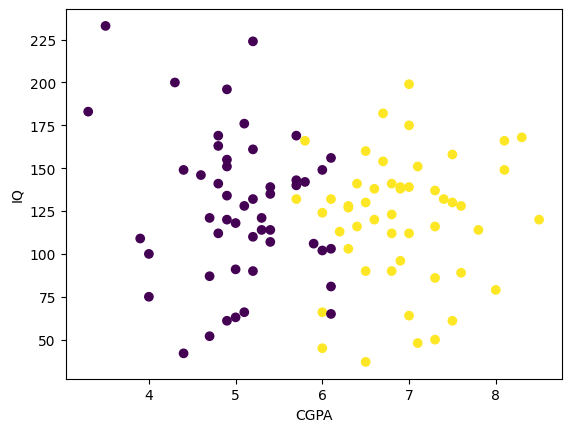

In [57]:
#scatter plot
plt.scatter(x = data['cgpa'], y = data['iq'], c=data['placement'])
plt.xlabel('CGPA')  # Label for x-axis
plt.ylabel('IQ')    # Label for y-axis


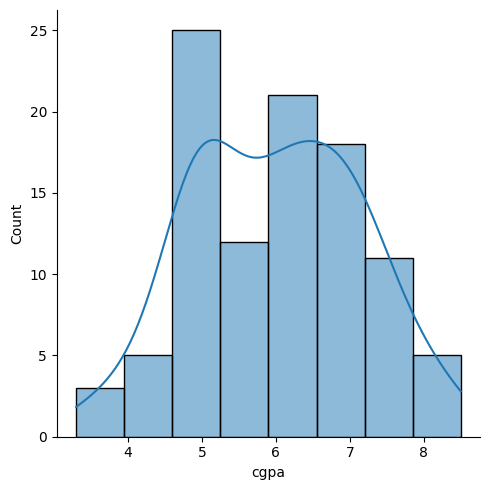

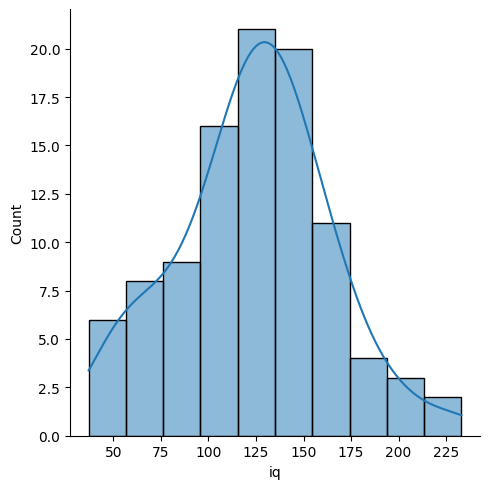

In [58]:
#distribution plot of cgpa
sns.displot(data['cgpa'], kde=True)
#distribution plot of iq
sns.displot(data['iq'], kde=True)

In [59]:
#highest cgpa
highest_cgpa = data['cgpa'].max()
print ("Highest CGPA:", highest_cgpa)
#highest iq
highest_iq = data['iq'].max()
print ("Highest IQ:", highest_iq)


Highest CGPA: 8.5
Highest IQ: 233.0


In [60]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
print(X.shape)
print(y.shape)


(100, 2)
(100,)


In [71]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(70, 2)
(30, 2)
(70,)
(30,)


In [ ]:
type(X_train)


numpy.ndarray

In [72]:
#standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [63]:
X_test  

array([[ 1.36840833,  0.10949567],
       [ 2.09339288,  1.07995296],
       [ 0.28093151,  0.03288063],
       [ 0.00906231, -1.5249587 ],
       [ 1.36840833, -1.65265045],
       [-1.25966065,  0.51810927],
       [-0.98779145, -0.14588782],
       [-0.98779145,  1.79502675],
       [ 0.00906231, -2.06126404],
       [ 0.73404686, -0.06927277],
       [-1.80339906, -0.65665481],
       [ 1.4590314 ,  0.05841897],
       [-0.98779145, -1.65265045],
       [ 0.00906231,  0.59472432],
       [ 1.1871622 , -1.01419171],
       [-0.17218383,  0.41595587],
       [-0.98779145,  0.74795441],
       [ 1.1871622 , -1.93357229],
       [-0.5346761 ,  0.33934082],
       [-1.89402213, -0.42680967]])

In [73]:
#tain the model using logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
#predict the values



LogisticRegression()

In [74]:
#predict and evaluate the model
y_pred = model.predict(X_test)


In [75]:
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1])

In [67]:
y_test

array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [76]:
#evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.9
Confusion Matrix:
 [[14  1]
 [ 2 13]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.93      0.87      0.90        15

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



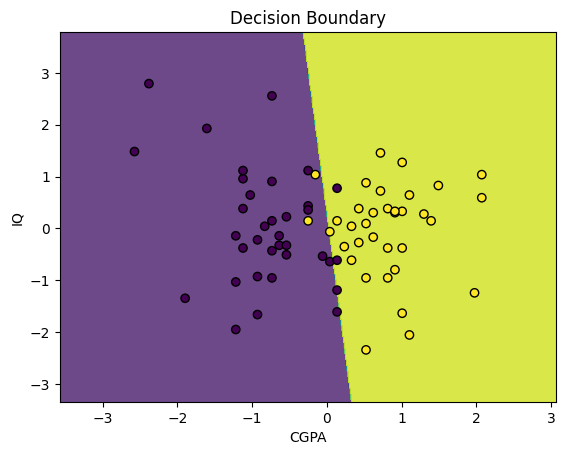

In [77]:
#plot the decision boundary
def plot_decision_boundary(X, y, model):
    # Create a mesh grid for plotting
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Predict the class for each point in the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('CGPA')
    plt.ylabel('IQ')
    plt.title('Decision Boundary')
    plt.show()
#plot the decision boundary
plot_decision_boundary(X_train, y_train, model)